In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
""" Problem 1"""
DJIA = pd.read_csv("/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk2_VisPandas/DJIA.csv")
DJIA.index = pd.to_datetime(DJIA["DATE"], format = "%Y-%m-%d")
DJIA["VALUE"] = DJIA["VALUE"].replace('.', np.nan).apply(np.float64)
del DJIA['DATE']
DJIA.head()

,VALUE
DATE,
2006-09-27,11689.24
2006-09-28,11718.45
2006-09-29,11679.07
2006-10-02,11670.35
2006-10-03,11727.34


In [5]:
""" Problem 2"""
paychecks = pd.read_csv("/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk2_VisPandas/paychecks.csv", names = ["Paychecks"])
paychecks.index = pd.date_range(start='3/13/2008', periods = np.ceil(len(paychecks)/2), freq="WOM-1FRI" ).union(\
                    pd.date_range(start='3/13/2008', periods = np.floor(len(paychecks)/2), freq="WOM-3FRI" ))
paychecks.head()

,Paychecks
2008-03-21,1122.26
2008-04-04,921.03
2008-04-18,962.46
2008-05-02,1035.97
2008-05-16,1078.59


In [3]:
""" Problem 4"""
finances = pd.read_csv("/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk2_VisPandas/finances.csv")
finances.index = pd.period_range("1978-09", periods = len(finances), freq = "Q-AUG")
finances.head()

,EARNINGS,EXPENSES
1979Q1,372572.16,122611.27
1979Q2,419440.58,133176.18
1979Q3,419766.49,154670.69
1979Q4,361453.31,209360.42
1980Q1,354463.33,174147.13


In [94]:
""" Problem 5"""
website = pd.read_csv("/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk2_VisPandas/website_traffic.csv")
website["TIME DIFF"] = pd.to_datetime(website["LEAVE"]) - pd.to_datetime(website["ENTER"])
daily_av_visit = website["TIME DIFF"].mean()
print(daily_av_visit)
website.index = pd.to_datetime(website["ENTER"])
website["Visits Per Hour"] = 1
visit_per_hour = website.resample('H').sum()
print(visit_per_hour)

0 days 00:05:04.731647
                     Visit Per Hour
ENTER                              
2016-10-07 01:00:00             618
2016-10-07 02:00:00             655
2016-10-07 03:00:00             670
2016-10-07 04:00:00             632
2016-10-07 05:00:00             672
2016-10-07 06:00:00             602
2016-10-07 07:00:00             660
2016-10-07 08:00:00             650
2016-10-07 09:00:00             665
2016-10-07 10:00:00             647
2016-10-07 11:00:00             605
2016-10-07 12:00:00             646
2016-10-07 13:00:00             670
2016-10-07 14:00:00             628
2016-10-07 15:00:00             607
2016-10-07 16:00:00             683
2016-10-07 17:00:00             632
2016-10-07 18:00:00             629
2016-10-07 19:00:00             702
2016-10-07 20:00:00             644
2016-10-07 21:00:00             641
2016-10-07 22:00:00             677


In [98]:
""" Problem 6"""

difference = DJIA["VALUE"] - DJIA["VALUE"].shift(1)
day_max_gain = difference.max()
print(largest_gain)
day_min_gain = difference.min()
print(smallest_gain)

month = DJIA.resample('M').first()
monthdiff = month["VALUE"] - month["VALUE"].shift(1)
month_max_gain = monthdiff.max()
print(month_max_gain)
month_min_gain = monthdiff.min()
print(month_min_gain)

936.42
-777.68
1556.75
-1539.85


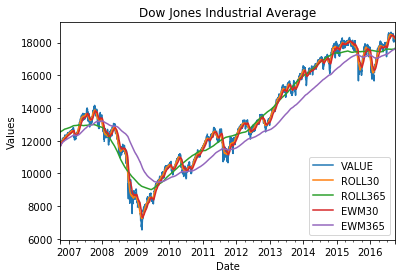

In [8]:
""" Problem 7"""

DJIA['ROLL30'] = DJIA['VALUE'].rolling(window=30,min_periods=1,center=True,).mean()
DJIA['ROLL365'] = DJIA['VALUE'].rolling(window=365,min_periods=1,center=True,).mean()
DJIA["EWM30"] = DJIA["VALUE"].ewm(span=30).mean()
DJIA["EWM365"] = DJIA["VALUE"].ewm(span=365).mean()

DJIA.plot()
plt.title("Dow Jones Industrial Average")
plt.ylabel("Values")
plt.xlabel("Date")
plt.legend()
plt.show()

In [6]:
DJIA['ROLL365']

DATE
2006-09-27   NaN
2006-09-28   NaN
2006-09-29   NaN
2006-10-02   NaN
2006-10-03   NaN
2006-10-04   NaN
2006-10-05   NaN
2006-10-06   NaN
2006-10-09   NaN
2006-10-10   NaN
2006-10-11   NaN
2006-10-12   NaN
2006-10-13   NaN
2006-10-16   NaN
2006-10-17   NaN
2006-10-18   NaN
2006-10-19   NaN
2006-10-20   NaN
2006-10-23   NaN
2006-10-24   NaN
2006-10-25   NaN
2006-10-26   NaN
2006-10-27   NaN
2006-10-30   NaN
2006-10-31   NaN
2006-11-01   NaN
2006-11-02   NaN
2006-11-03   NaN
2006-11-06   NaN
2006-11-07   NaN
              ..
2016-08-16   NaN
2016-08-17   NaN
2016-08-18   NaN
2016-08-19   NaN
2016-08-22   NaN
2016-08-23   NaN
2016-08-24   NaN
2016-08-25   NaN
2016-08-26   NaN
2016-08-29   NaN
2016-08-30   NaN
2016-08-31   NaN
2016-09-01   NaN
2016-09-02   NaN
2016-09-05   NaN
2016-09-06   NaN
2016-09-07   NaN
2016-09-08   NaN
2016-09-09   NaN
2016-09-12   NaN
2016-09-13   NaN
2016-09-14   NaN
2016-09-15   NaN
2016-09-16   NaN
2016-09-19   NaN
2016-09-20   NaN
2016-09-21   NaN
2016-09-2